# Analysis of Spotify Song Characteristics Relative to Popularity
### Ashley Brinker
#### 1 June 2022

# Introduction:
This project is an evaluation of song popularity based on song characteristics. These characteristics include traditional Music Theory, as well as Spotify designed qualitites that help with song recommendation algorithms. 
    
Music recommendation algorithms and the idea of 'pop music' are interesting fields of study when it comes to music creation. The existence of 'pop music' leads to the expectation that certain songs are inherently more popular by genre classification. Genre is assigned by song qualities, so we expect to find some qualities that directly impact popularity. While this project isn't seeking to alter the creativity of musicians in the goal of a hit track, it is seeking to find reasons why any song gains popularity in the first place.  
    
This project is a continuation of my undergraduate capstone that evaluated Spotify audio features for genre classification. 
    
Some hypotheses at the beginning of this project include:
    
1. Album type (single, album, or compilation) will affect song popularity. Singles will be more popular than albums or compilations, considering singles are often released as the "hit single" before an album release. The singles are also often included on the album, and thus have multiple opportunities to be played.
    
2. Artist popularity affects song popularity. The more popular the artist is, the more popular the song will be due to an established fan base.
    
3. Valence and Danceability will have an impact on popularity. Songs with a higher Valence are percived as "happier," and songs with a higher Danceability are more upbeat and "danceable." These songs have a higher liklihood of being played on the radio or in a public setting.
    
4. Speechiness and Instrumentalness will have an impact on popularity. Speechiness is the measure of spoken word in a song, while Instrumentalness is the measure of instrumentals in a song. It's expected that a purely spoken word (i.e. poetry or book recording) will have a lower popularity, as well as purely instrumental tracks. 

# Data Explained
    
This data was retrieved using the Spotify API for developers. This required an understanding of tokenization to authorize access, as well as API querying based on the documentation found here: https://developer.spotify.com/documentation/web-api/
    
The subsequent steps included:
- Track querying to retrieve track IDs and track catalog information based on our filtering years (2010-2021).
- Track attribute querying to retrieve audio features for every track, using track IDs.
- Artist attribute querying to retrieve artist catalog information, using artist IDs. 
- Clean the data based on Spotify's predefined ranges (i.e. remove any data that contains a value that represents uncertainty or no measurement available).

#### Data Dictionary
| Field Name | Type | Description |
|------------|------|-------------|
|Track_ID|string of alphanumeric characters|Unique identifier for tracks in Spotify.|
|Track_Name|string|The official track title.|
|Popularity|int|A track's popularity; 0 being least popular and 100 being most popular.|
|Artist_Name|string|The primary artist name.|
|Artist_Popularity|int|An artist's popularity; 0 being least popular and 100 being most popular.|
|Album_Type|string|Album type; allowed values:"album", "single", "compilation".|
|Album_Total_Tracks|int|How many tracks are in the album.|
|Release_Date|string|The release date; format of "XXXX" year, "XXXX-XX" month, or "XXXX-XX-XX" day.|
|Acousticness|float|A confidence measure from 0.0 to 1.0 of whether the track is acoustic; 1.0 represents high confidence the track is acoustic.|
|Danceability|float|How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity; a value of 0.0 is least danceable and 1.0 is most danceable.|
|Energy|float|A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity; a value of 0.0 is low energy and 1.0 is high energy.|
|Instrumentalness|float|A prediciton of whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.|
|Key|int|The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.|
|Liveness|float|The presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.|
|Loudness|float|The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.|
|Mode|int|The modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|Speechiness|float|The presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.|
|Tempo|float|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.|
|Time_Signature|int|An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".|
|Valence|float|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).|

# Results
    
We begin by confirming our data with info() and exploring a heatmap of our desired variables.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [9]:
df = pd.read_csv('EDA_data2.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Track_ID            11485 non-null  object 
 1   Track_Name          11485 non-null  object 
 2   Popularity          11485 non-null  int64  
 3   Artist_Name         11485 non-null  object 
 4   Artist_Popularity   11485 non-null  int64  
 5   Album_Type          11485 non-null  object 
 6   Album_Total_Tracks  11485 non-null  int64  
 7   Acousticness        11485 non-null  float64
 8   Danceability        11485 non-null  float64
 9   Energy              11485 non-null  float64
 10  Instrumentalness    11485 non-null  float64
 11  Key                 11485 non-null  int64  
 12  Liveness            11485 non-null  float64
 13  Loudness            11485 non-null  float64
 14  Mode                11485 non-null  int64  
 15  Speechiness         11485 non-null  float64
 16  Temp

<AxesSubplot:>

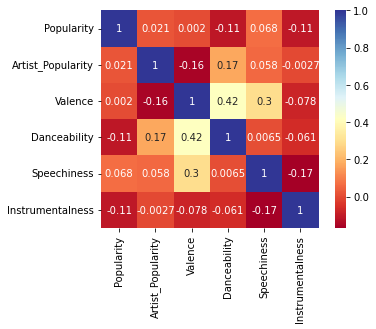

In [10]:
#list of the columns we want to explore
columns = ['Popularity','Artist_Popularity','Valence','Danceability','Speechiness','Instrumentalness']
df_corr = df[columns]
corrmat = df_corr.corr()

#heatmap with selected columns
sns.heatmap(corrmat, square=True, annot=True, cmap='RdYlBu')

### Heatmap Results

The heatmap shows that there is no strong correlation with any individual variable and popularity. The correlation between Valence and Danceability is in line with our expectations of "happy songs," and thus gives us some inital expectations with our third hypothesis. 

## Hypothesis: Album Type will affect song popularity. 
    
Singles will be more popular than album or compilation tracks. 

album          8019
compilation    2014
single         1452
Name: Album_Type, dtype: int64

<AxesSubplot:xlabel='Album_Type', ylabel='Popularity'>

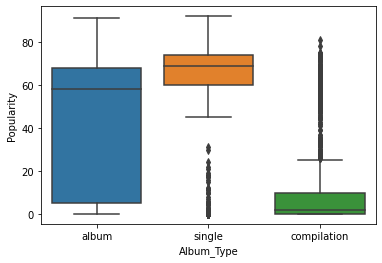

In [11]:
df['Album_Type'].value_counts()
sns.boxplot(x=df['Album_Type'], y=df['Popularity'])

### Album Type Boxplot Results
It appears that singles tend to have a higher popularity ranking than albums or compilations. While there appear to be outliers in single and compilation, the data has been pulled from a reputible source and evaluated as correct. 

## Hypothesis: Artist popularity will have an impact on popularity.
    
The more popular the artist is, the more popular the song will be.

In [15]:
df['Artist_Name'].nunique()
df['Artist_Popularity'].describe()

3526

count    11485.000000
mean        83.680627
std          9.623487
min         63.000000
25%         76.000000
50%         85.000000
75%         93.000000
max         98.000000
Name: Artist_Popularity, dtype: float64

Here we plan to evaluate tracks by the popularity of the artist by percentile.

In [17]:
cat_25 = df['Artist_Popularity'].describe()[4]
cat_50 = df['Artist_Popularity'].describe()[5]
cat_75 = df['Artist_Popularity'].describe()[6]

#categorize artists by percentile
df['Artist_Rank'] = pd.Categorical(np.where(df['Artist_Popularity'] > cat_25,3,4))
df['Artist_Rank'] = pd.Categorical(np.where(df['Artist_Popularity'] > cat_50,2,df['Artist_Rank']))
df['Artist_Rank'] = pd.Categorical(np.where(df['Artist_Popularity'] > cat_75,1,df['Artist_Rank']))

In [20]:
df['Artist_Rank'].value_counts().sort_values()

1    1850
3    2756
4    3215
2    3664
Name: Artist_Rank, dtype: int64

In [23]:
df.groupby('Artist_Rank').describe(include=np.number)['Popularity']

,count,mean,std,min,25%,50%,75%,max
Artist_Rank,,,,,,,,
1,1850.0,45.577297,30.020756,0.0,7.0,60.0,69.0,91.0
2,3664.0,36.881004,31.661024,0.0,1.0,51.0,67.0,91.0
3,2756.0,43.699565,30.513222,0.0,5.0,59.0,69.0,90.0
4,3215.0,36.273406,31.564794,0.0,1.0,49.0,67.0,92.0


<AxesSubplot:xlabel='Artist_Rank', ylabel='Popularity'>

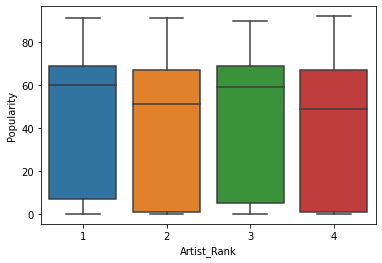

In [24]:
sns.boxplot(x=df['Artist_Rank'], y=df['Popularity'])

### Artist Popularity Boxplot Results:
It appears that artist popularity has no significant effect on track popularity. 

## Hypothesis: Valence and Danceability will impact popularity. 
    
Tracks with higher valence and danceability will have a higher popularity. 

In [35]:
df['Valence'].describe()
val_25 = df['Valence'].describe()[4]
val_50 = df['Valence'].describe()[5]
val_75 = df['Valence'].describe()[6]

count    11485.000000
mean         0.552294
std          0.225774
min          0.078400
25%          0.377000
50%          0.591000
75%          0.720000
max          0.955000
Name: Valence, dtype: float64

Again we utilize percentiles to see how Valence alone affects popularity. 

In [36]:
#categorize valence by percentile
df['Val_Rank'] = pd.Categorical(np.where(df['Valence'] > val_25,3,4),ordered=True)
df['Val_Rank'] = pd.Categorical(np.where(df['Valence'] > val_50,2,df['Val_Rank']),ordered=True)
df['Val_Rank'] = pd.Categorical(np.where(df['Valence'] > val_75,1,df['Val_Rank']),ordered=True)

In [37]:
df['Val_Rank'].value_counts()

4    3005
2    2982
1    2752
3    2746
Name: Val_Rank, dtype: int64

<AxesSubplot:xlabel='Val_Rank', ylabel='Popularity'>

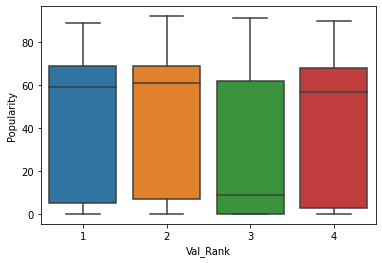

In [38]:
sns.boxplot(x=df['Val_Rank'], y=df['Popularity'])

In [39]:
df['Danceability'].describe()
dan_25 = df['Danceability'].describe()[4]
dan_50 = df['Danceability'].describe()[5]
dan_75 = df['Danceability'].describe()[6]

count    11485.000000
mean         0.626414
std          0.141320
min          0.247000
25%          0.542000
50%          0.671000
75%          0.723000
max          0.855000
Name: Danceability, dtype: float64

Again we utilize percentiles to see how Danceability alone affects popularity. 

In [40]:
#categorize danceability by percentile
df['Dance_Rank'] = pd.Categorical(np.where(df['Danceability'] > dan_25,3,4),ordered=True)
df['Dance_Rank'] = pd.Categorical(np.where(df['Danceability'] > dan_50,2,df['Dance_Rank']),ordered=True)
df['Dance_Rank'] = pd.Categorical(np.where(df['Danceability'] > dan_75,1,df['Dance_Rank']),ordered=True)

In [41]:
df['Dance_Rank'].value_counts()

4    3003
2    2955
3    2780
1    2747
Name: Dance_Rank, dtype: int64

<AxesSubplot:xlabel='Dance_Rank', ylabel='Popularity'>

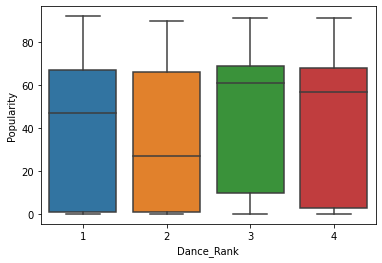

In [42]:
sns.boxplot(x=df['Dance_Rank'], y=df['Popularity'])

Here we utilize the percentiles of Valence and Danceability to define a new variable "Feel" which denotes happy for both contributing variables in the top 50%, sad for both in the bottom 50%, and neutral for any combination of one in the top 50% and one in the bottom 50%. 

In [43]:
#categorize feeling by danceability and valence
df['Feel'] = pd.Categorical(np.where((df['Dance_Rank'] >= 2) & (df['Dance_Rank'] >= 2),'happy','neutral'))
df['Feel'] = pd.Categorical(np.where((df['Dance_Rank'] <= 3) & (df['Dance_Rank'] <= 3),'sad',df['Feel']))


In [44]:
df['Feel'].value_counts()

sad      8482
happy    3003
Name: Feel, dtype: int64

With no songs listed as neutral, we can refer back to the correlation heatmap between Valence and Danceability. 

<AxesSubplot:xlabel='Feel', ylabel='Popularity'>

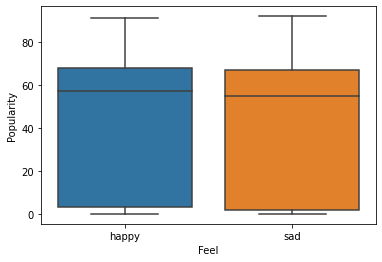

In [45]:
sns.boxplot(x=df['Feel'], y=df['Popularity'])

### Danceability, Valence and Feel Boxplot Results:
    
It appears that neither Valence nor Danceability have a significant effect on track popularity, nor does a combination of the two. This could suggest that traditional radio listening does not affect overall Spotify streams. 

## Hypothesis: Speechiness and Instrumentalness will have an impact on popularity.
    
Spoken word tracks and instruemntal tracks will have a lower popularity than tracks that incorporate both components. 

In [12]:
speech_high = .66 #songs with speechiness higher than this are likely spoken word tracks
speech_low = .33 #songs with speechiness lower than this are likely instrumental tracks
instrum_mid = .5 #songs with instrumentalness higher than this are likely instrumental tracks

df['Track_Type'] = pd.Categorical(np.where(df['Speechiness'] > speech_high,'spoken','track'))
df['Track_Type'] = pd.Categorical(np.where((df['Speechiness'] < speech_low) & (df['Instrumentalness'] > instrum_mid), \
                                        'instrumental', df['Track_Type']))

track           11029
instrumental      456
Name: Track_Type, dtype: int64

<AxesSubplot:xlabel='Track_Type', ylabel='Popularity'>

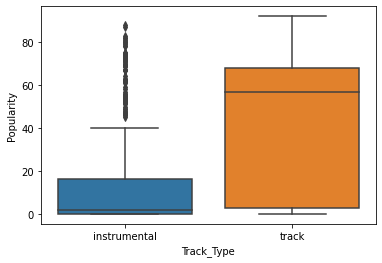

In [13]:
df['Track_Type'].value_counts()
sns.boxplot(x=df['Track_Type'], y=df['Popularity'])

### Spoken Word and Instrumental Boxplot Results:
It appears that instrumental songs tend to have a lower popularity. There are no spoken word tracks in this dataset. 

<div style='background-color: darkseagreen;' />

# Summary
    
It appears that the only significant effect of track features on  popularity is the album type. This is en expected finding considering most singles are designed to be the most popular song on an album, and these songs tend to appear in multiple locations on Spotify (once in the single's 'album' and again in the full album. It is surprising to me that none of the other qualities affect popularity. 
    
The only difficulties with this project as a whole was obtaining the data. Spotify has limits on how many requests can be made in a certain duration of time, and with multiple requests per track, it was cumbersome to gather the data while staying within the restrictions. 
    
Some possible next steps could include evaluating a single genre at a time and exploring possible effects within specific genres. This would have to be done on a macro level, considering Spotify genres have a lengthy hierarchy with hyper specific categories. 